In [14]:
%matplotlib inline
import os

import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import pandas as pd
import numpy as np

PROJECT_DIR = '/mnt/ml-team/minerva/open-solutions/value-prediction'

In [15]:
train = pd.read_csv(os.path.join(PROJECT_DIR, 'files/train.csv'))

In [16]:
train.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [17]:
corrs = []
for col in tqdm(train.columns):
    if col in ['ID','target']:
        continue
    else:
        corr = np.corrcoef(train['target'], train[col])[0,1]
        if str(corr) =='nan':
            corr = 0
        corrs.append((col, corr))

HBox(children=(IntProgress(value=0, max=4993), HTML(value='')))

/mnt/ml-team/homes/jakub.czakon/.env/cpu_py3/lib/python3.5/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/mnt/ml-team/homes/jakub.czakon/.env/cpu_py3/lib/python3.5/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [18]:
corrs_sorted = sorted(corrs,key=lambda x: abs(x[1]), reverse=True)
corrs_sorted[:10]

[('555f18bd3', 0.27337916364376835),
 ('9fd594eec', 0.2700187649219098),
 ('5bc7ab64f', 0.26785794957032366),
 ('cbbc9c431', 0.26500504163169153),
 ('f190486d6', 0.26382138967397695),
 ('6b119d8ce', 0.25828985193061393),
 ('f74e8f13d', 0.25723771794759853),
 ('ac30af84a', 0.25629155060534015),
 ('26fc93eb7', 0.2551862663763837),
 ('58e2e02e6', 0.2549838791100175)]

In [19]:
y = [val for _,val in corrs_sorted]
x = range(len(y))

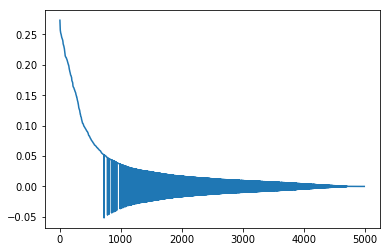

In [20]:
plt.plot(x,y)

In [21]:
cols = [name for name,val in corrs_sorted][:10]

train[cols+['target']].sample(10)

,555f18bd3,9fd594eec,5bc7ab64f,cbbc9c431,f190486d6,6b119d8ce,f74e8f13d,ac30af84a,26fc93eb7,58e2e02e6,target
3947,0.0,0.0,0.0,0.0,0.0,0.0,20000000.0,0.0,0.00,0.0,25000000.0
2704,400000.0,0.0,0.0,0.0,4000000.0,0.0,0.0,0.0,220000.00,16000.0,400000.0
4146,0.0,3000000.0,0.0,5500000.0,0.0,0.0,0.0,0.0,0.00,0.0,4000000.0
1322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,400000.0
925,0.0,0.0,0.0,0.0,92500.0,0.0,105000.0,0.0,10000.00,0.0,60000.0
38,0.0,0.0,0.0,0.0,0.0,0.0,15000000.0,0.0,0.00,0.0,18000000.0
2388,0.0,0.0,0.0,0.0,2000000.0,0.0,1000000.0,0.0,0.00,0.0,2000000.0
3247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,600000.0
587,0.0,0.0,0.0,0.0,334000.0,0.0,0.0,0.0,0.00,68000.0,738000.0
48,2000000.0,700000.0,0.0,0.0,1200000.0,0.0,0.0,0.0,1066666.66,0.0,13200000.0


In [22]:
cols_to_keep = []
for col, val in corrs_sorted:
    cols_to_keep.append(col)
    if val<0:
        break
len(cols_to_keep)

725